In [1]:
import sys
sys.path.append('../')

import matplotlib.pyplot as plt
%matplotlib inline

from dataset import MAESTRO_small
from constants import HOP_SIZE

/home/jakeoneijk/anaconda3/envs/main/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Dataset

MAESTRO_small is a dataset class for piano transcription. You can specify the path of the maestro dataset through *path*. *groups* indicates the dataset splits. You can select some of the below and pass them as a list of strings.
```
>>train_set.available_groups()
['train', 'validation', 'test', 'debug']
```
When you create the dataset, it will read all the files (audio, midi) and parse them. Here, we will use `'debug'` dataset, which is a subset of the `'train'` dataset (first 10 pieces).

In [2]:
example_dataset = MAESTRO_small(path='../data', groups=['debug'], sequence_length=None, random_sample=True)

Loading 1 group(s) of MAESTRO_small at ../data


Loading group debug: 100%|██████████| 10/10 [00:03<00:00,  2.82it/s]


In [3]:
example_dataset.available_groups()

['train', 'validation', 'test', 'debug']

### Data types
You can treat it as a python list. When you access it with an index, `__getitem__` method will be called.
It will return a python dict which contains the file paths, normalized audios, and piano rolls.

Sample rate of the audio is `16000` and we will use `hop_size=512` for mel-spectrogram and piano roll, resulting in  frame rate of `16000/512 == 31.25`.

In the example below, we examine the shapes of the tensors in the dataset.

In [4]:
data = example_dataset[1]
print(f'data: {data}')
print(f'audio_shape: {data["audio"].shape}')
print(f'frame_roll_shape: {data["frame"].shape}')
print(f'onset_roll_shape: {data["onset"].shape}')

print(f'HOP_SIZE({HOP_SIZE}) x piano_roll length({data["frame"].shape[0]}): {HOP_SIZE*data["frame"].shape[0]}')

data: {'path': '../data/2004/MIDI-Unprocessed_SMF_12_01_2004_01-05_ORIG_MID--AUDIO_12_R1_2004_08_Track08_wav.flac', 'audio': tensor([-0.0002, -0.0002, -0.0001,  ...,  0.0149,  0.0022, -0.0390]), 'frame': tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]), 'onset': tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])}
audio_shape: torch.Size([5411840])
frame_roll_shape: torch.Size([10570, 88])
onset_roll_shape: torch.Size([10570, 88])
HOP_SIZE(512) x piano_roll length(10570): 5411840


### Piano roll
Piano roll is an array-like representation of notes.
`frame` and `onset` are tensors of shape (*number of frames*, *number of pithces (88)*).

The `frame` represents the sustains of the notes and `onset` marks the attacks of the notes.
Let's suppose there is a piano note of pitch `p` pressed at time `t1` and released at `t2`.  
Then, `frame[t1:t2+1, p] == 1` and `onset[t1, p] == 1`, and `0` everywhere else.


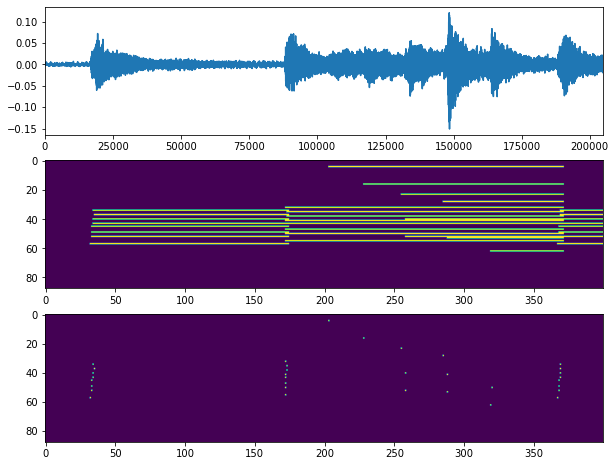

In [5]:
plt.figure(figsize=(10,8))
plt.subplot(311)
plt.plot(data['audio'].numpy()[:400*HOP_SIZE])
plt.autoscale(enable=True, axis='x', tight=True)
plt.subplot(312)
plt.imshow(data['frame'].numpy()[:400].T, aspect='auto', origin='upper')
plt.subplot(313)
plt.imshow(data['onset'].numpy()[:400].T, aspect='auto', origin='upper')


### sequence_length & random_sample
If we specify the `sequence_length`, the dataset trims the audio into the given length. When `random_sample=False`, the segments at the start of the audio will be used. If `random_sample=True`, the segments starting at random position will be used. We will use this attribute to make our training samples stocastic.

if `sequence_length` is not divisible by `HOP_SIZE`, it will shorten the audio for proper adjustment.

In [6]:
example_dataset = MAESTRO_small(path='../data', groups=['debug'], sequence_length=10000, random_sample=True)

Loading 1 group(s) of MAESTRO_small at ../data


Loading group debug: 100%|██████████| 10/10 [00:03<00:00,  2.92it/s]


In [7]:
data = example_dataset[1]
print(f'audio_shape: {data["audio"].shape}')
print(f'frame_roll_shape: {data["frame"].shape}')
print(f'onset_roll_shape: {data["onset"].shape}')

audio_shape: torch.Size([9728])
frame_roll_shape: torch.Size([19, 88])
onset_roll_shape: torch.Size([19, 88])
